In [1]:
import polars as pl
ilp = pl.read_ndjson("results_uv run ilp.py_524.jsonl")
#ilp = pl.read_ndjson("../val/results_.._astar-3-524.jsonl")
astar = pl.read_ndjson("results_._astar-current -i 3 -s static_5-2-4.jsonl")
astar.head()

instance,success,total_time,missing,output
struct[3],bool,f64,i64,struct[4]
"{5,[[2, 6], [3, 10]],0}",true,0.000027,0,"{""astar"",true,{[[[3, 1], [4, 1]], [[2, 1], [3, 1]], [[2, 0], [2, 1]]],[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000027}"
"{5,[[2, 6], [3, 11]],1}",true,0.000026,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],[[[1, 2], [0, 2]], [[2, 2], [1, 2]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000026}"
"{5,[[2, 6], [3, 15]],2}",true,0.000024,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,[[[3, 2], [4, 2]], [[2, 2], [3, 2]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000024}"
"{5,[[2, 6], [3, 16]],3}",true,0.000025,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,[[[1, 3], [0, 3]], [[2, 3], [1, 3]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000025}"
"{5,[[2, 6], [3, 20]],4}",true,0.000027,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,null,[[[3, 3], [4, 3]], [[2, 3], [3, 3]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000027}"


In [2]:
astar.head()

instance,success,total_time,missing,output
struct[3],bool,f64,i64,struct[4]
"{5,[[2, 6], [3, 10]],0}",true,0.000027,0,"{""astar"",true,{[[[3, 1], [4, 1]], [[2, 1], [3, 1]], [[2, 0], [2, 1]]],[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000027}"
"{5,[[2, 6], [3, 11]],1}",true,0.000026,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],[[[1, 2], [0, 2]], [[2, 2], [1, 2]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000026}"
"{5,[[2, 6], [3, 15]],2}",true,0.000024,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,[[[3, 2], [4, 2]], [[2, 2], [3, 2]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000024}"
"{5,[[2, 6], [3, 16]],3}",true,0.000025,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,[[[1, 3], [0, 3]], [[2, 3], [1, 3]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000025}"
"{5,[[2, 6], [3, 20]],4}",true,0.000027,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,null,[[[3, 3], [4, 3]], [[2, 3], [3, 3]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000027}"


In [3]:
joined = ilp.join(
    astar,
    on="instance",  # The common column to match on
    how="inner",      # The type of join (can be "left", "outer", etc.)
    suffix="_astar"
)
joined.head()

instance,success,total_time,missing,output,success_astar,total_time_astar,missing_astar,output_astar
struct[3],bool,f64,i64,struct[4],bool,f64,i64,struct[4]
"{5,[[2, 6], [3, 10]],0}",true,0.004805,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],[[[2, 0], [2, 1]], [[2, 1], [3, 1]], [[3, 1], [4, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.004805}",true,0.000027,0,"{""astar"",true,{[[[3, 1], [4, 1]], [[2, 1], [3, 1]], [[2, 0], [2, 1]]],[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000027}"
"{5,[[2, 6], [3, 11]],1}",true,0.006116,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],null,[[[2, 0], [2, 1]], [[1, 1], [1, 2]], … [[1, 2], [0, 2]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.006116}",true,0.000026,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],[[[1, 2], [0, 2]], [[2, 2], [1, 2]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000026}"
"{5,[[2, 6], [3, 15]],2}",true,0.006911,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],null,null,[[[2, 0], [2, 1]], [[2, 1], [3, 1]], … [[3, 2], [4, 2]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.006911}",true,0.000024,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,[[[3, 2], [4, 2]], [[2, 2], [3, 2]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000024}"
"{5,[[2, 6], [3, 16]],3}",true,0.005043,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],null,null,null,[[[2, 0], [2, 1]], [[1, 1], [1, 2]], … [[1, 3], [0, 3]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.005043}",true,0.000025,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,[[[1, 3], [0, 3]], [[2, 3], [1, 3]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000025}"
"{5,[[2, 6], [3, 20]],4}",true,0.007875,0,"{""ilp"",true,{[[[1, 0], [1, 1]], [[1, 1], [0, 1]]],null,null,null,null,[[[2, 0], [2, 1]], [[2, 1], [3, 1]], … [[3, 3], [4, 3]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.007875}",true,0.000027,0,"{""astar"",true,{null,[[[1, 1], [0, 1]], [[1, 0], [1, 1]]],null,null,null,[[[3, 3], [4, 3]], [[2, 3], [3, 3]], … [[2, 0], [2, 1]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null},0.000027}"


In [4]:
len(joined)

8703

In [5]:
reverse_problemcases = joined.filter(
    (pl.col("success") == False) & (pl.col("success_astar") == True)
)

print(reverse_problemcases)

shape: (0, 9)
┌───────────┬─────────┬────────────┬─────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ instance  ┆ success ┆ total_time ┆ missing ┆ … ┆ success_as ┆ total_time ┆ missing_a ┆ output_as │
│ ---       ┆ ---     ┆ ---        ┆ ---     ┆   ┆ tar        ┆ _astar     ┆ star      ┆ tar       │
│ struct[3] ┆ bool    ┆ f64        ┆ i64     ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---       │
│           ┆         ┆            ┆         ┆   ┆ bool       ┆ f64        ┆ i64       ┆ struct[4] │
╞═══════════╪═════════╪════════════╪═════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
└───────────┴─────────┴────────────┴─────────┴───┴────────────┴────────────┴───────────┴───────────┘


In [6]:
problemcases = joined.filter(
    (pl.col("success") == True) & (pl.col("success_astar") == False)
)

problemcases

instance,success,total_time,missing,output,success_astar,total_time_astar,missing_astar,output_astar
struct[3],bool,f64,i64,struct[4],bool,f64,i64,struct[4]
"{5,[[2, 10], [4, 6], [11, 20]],611}",true,0.011344,0,"{""ilp"",true,{null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[0, 2], [1, 2]], [[1, 2], [1, 3]], … [[3, 3], [4, 3]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[1, 0], [1, 1]], [[1, 1], [2, 1]], … [[3, 1], [4, 1]]],null,[[[3, 0], [3, 1]], [[1, 1], [0, 1]], … [[3, 2], [2, 2]]],null,null,null,null,null,null,null},0.011344}",false,0.000104,1,"{""astar"",false,{null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[3, 3], [4, 3]], [[3, 2], [3, 3]], … [[0, 2], [1, 2]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[3, 1], [4, 1]], [[2, 1], [3, 1]], … [[1, 0], [1, 1]]],null,null,null,null,null,null,null,null},0.000104}"
"{5,[[2, 10], [4, 6], [11, 24]],614}",true,0.020216,0,"{""ilp"",true,{null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[0, 2], [1, 2]], [[1, 2], [1, 3]], … [[3, 3], [3, 4]]],null,null,null,null,null,null,null,null,null,null,null,[[[1, 0], [1, 1]], [[1, 1], [2, 1]], … [[3, 1], [4, 1]]],null,[[[3, 0], [3, 1]], [[1, 1], [0, 1]], … [[3, 2], [2, 2]]],null,null,null,null,null,null,null},0.020216}",false,0.000104,1,"{""astar"",false,{null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[3, 3], [3, 4]], [[3, 2], [3, 3]], … [[0, 2], [1, 2]]],null,null,null,null,null,null,null,null,null,null,null,null,[[[3, 1], [4, 1]], [[2, 1], [3, 1]], … [[1, 0], [1, 1]]],null,null,null,null,null,null,null,null},0.000104}"
"{5,[[2, 10], [4, 6], [15, 16]],615}",true,0.00976,0,"{""ilp"",true,{null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[3, 2], [3, 3]], [[4, 2], [3, 2]], … [[3, 3], [2, 3]]],null,null,null,null,null,null,null,null,null,null,[[[1, 0], [1, 1]], [[1, 1], [1, 2]], … [[3, 2], [3, 1]]],null,[[[3, 0], [3, 1]], [[1, 1], [0, 1]], … [[3, 1], [2, 1]]],null,null,null,null,null,null,null},0.00976}",false,0.000126,1,"{""astar"",false,{null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[1, 3], [0, 3]], [[2, 3], [1, 3]], … [[4, 2], [3, 2]]],null,null,null,null,null,null,null,null,null,null,null,[[[3, 1], [4, 1]], [[2, 1], [3, 1]], … [[1, 0], [1, 1]]],null,null,null,null,null,null,null,null},0.000126}"
"{5,[[2, 10], [4, 6], [15, 22]],616}",true,0.013409,0,"{""ilp"",true,{null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[3, 2], [3, 3]], [[4, 2], [3, 2]], … [[3, 3], [2, 3]]],null,null,null,null,null,null,null,null,null,[[[1, 0], [1, 1]], [[1, 1], [1, 2]], … [[3, 2], [3, 1]]],null,[[[3, 0], [3, 1]], [[1, 1], [0, 1]], … [[3, 1], [2, 1]]],null,null,null,null,null,null,null},0.013409}",false,0.000133,1,"{""astar"",false,{null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[1, 3], [1, 4]], [[2, 3], [1, 3]], … [[4, 2], [3, 2]]],null,null,null,null,null,null,null,null,null,null,[[[3, 1], [4, 1]], [[2, 1], [3, 1]], … [[1, 0], [1, 1]]],null,null,null,null,null,null,null,null},0.000133}"
"{5,[[2, 10], [4, 23], [11, 20]],709}",true,0.011741,0,"{""ilp"",true,{null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,[[[3, 0], [3, 1]], [[3, 1], [3, 2]], … [[2, 3], [2, 4]]],null,null,null,null,null,null,null,[[[0, 2], [1, 2]], [[1, 2], [1, 3]], … [[3, 3], [4, 3]]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,

In [7]:
joined.select(pl.sum("total_time"))

total_time
f64
136.754528


In [8]:
joined.select(pl.sum("total_time_astar"))

total_time_astar
f64
0.372424


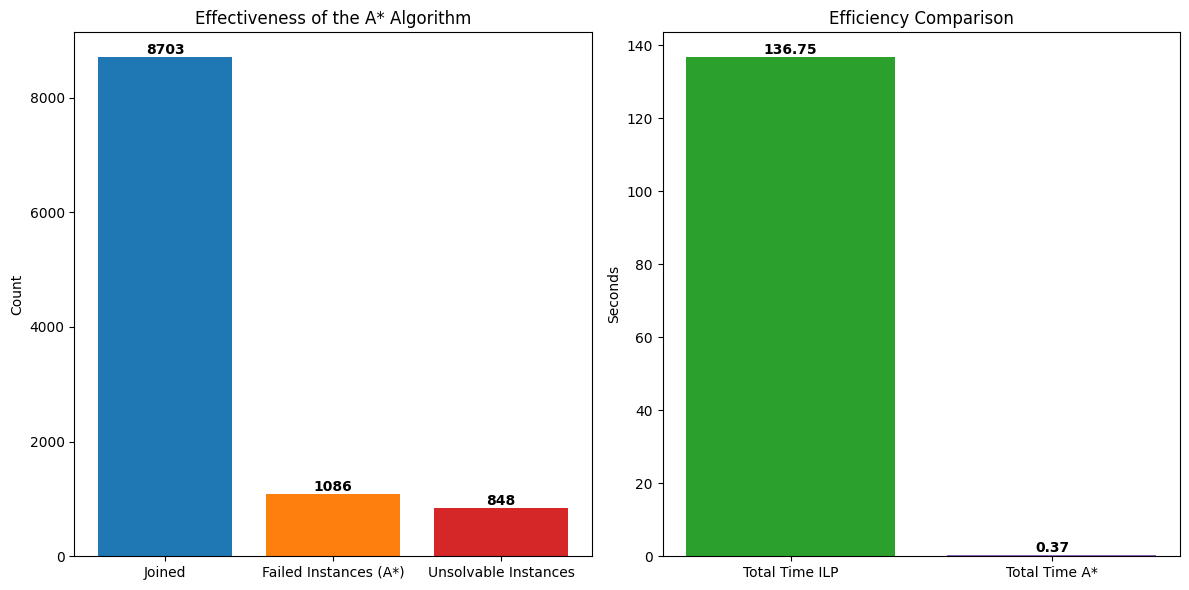

In [10]:
not_solved_astar = joined.filter(
    pl.col("success_astar") == False
)
unsolvable = joined.filter(
    pl.col("success") == False
)
import matplotlib.pyplot as plt
import polars as pl

def plot_performance_comparison(joined, problemcases, not_solved):
    """
    Displays two side-by-side bar plots:
    1. Comparison of dataset lengths (joined, problemcases, not_solved).
    2. Comparison of total time sums (total_time vs total_time_astar).
    
    Parameters:
    - joined: Polars DataFrame containing 'total_time' and 'total_time_astar' columns.
    - problemcases: Polars DataFrame (used for length count).
    - not_solved: Polars DataFrame (used for length count).
    """
    
    # --- Prepare Data for Plot 1 (Counts) ---
    count_labels = ['Joined', 'Failed Instances (A*)', 'Unsolvable Instances']
    count_values = [len(joined), len(problemcases), len(not_solved)]
    count_colors = ['#1f77b4', '#ff7f0e', '#d62728'] # Blue, Orange, Red

    # --- Prepare Data for Plot 2 (Time Sums) ---
    # We use .item() to extract the scalar value from the resulting 1x1 DataFrame
    total_time_sum = joined.select(pl.sum("total_time")).item()
    astar_time_sum = joined.select(pl.sum("total_time_astar")).item()
    
    time_labels = ['Total Time ILP', 'Total Time A*']
    time_values = [total_time_sum, astar_time_sum]
    time_colors = ['#2ca02c', '#9467bd'] # Green, Purple

    # --- Create Plots ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot 1: Dataset Counts
    axes[0].bar(count_labels, count_values, color=count_colors)
    axes[0].set_title('Effectiveness of the A* Algorithm')
    axes[0].set_ylabel('Count')
    
    # Add value labels on top of bars
    for i, v in enumerate(count_values):
        axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

    # Plot 2: Time Comparison
    axes[1].bar(time_labels, time_values, color=time_colors)
    axes[1].set_title('Efficiency Comparison')
    axes[1].set_ylabel('Seconds')

    
    # Add value labels on top of bars
    for i, v in enumerate(time_values):
        axes[1].text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

plot_performance_comparison(joined, not_solved_astar, unsolvable)